# Practico Mentoria - Analisis y Visualizacion de Datos

---

### Importaciones

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from collections import OrderedDict
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("whitegrid")
sns.set_context('talk')

In [3]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga de los Datesets

In [4]:
df_player = pd.read_csv('./Datasets/football_player.csv')
df_team = pd.read_csv('./Datasets/football_team.csv')
df_match = pd.read_csv('./Datasets/football_match.csv')

### Exploremos un poco los Datasets

> #### Players Dataset

In [5]:
print("Shape = {}".format(df_player.shape))

Shape = (9925, 44)


In [6]:
df_player.sample(10)

,player_name,birthday,age,height_m,weight_kg,imc,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
858,Ariel Borysiuk,1991-07-29,24,1.80,69.85,21.48,66.12,74.38,right,medium,...,70.46,49.21,51.58,63.58,63.08,12.71,13.04,18.71,15.54,13.04
8529,Sava Miladinovic Bento,1991-01-02,25,1.83,72.12,21.56,58.00,64.43,right,medium,...,59.64,49.50,41.64,46.57,40.07,8.00,8.00,8.00,7.00,14.00
2527,Dusan Tadic,1988-11-20,27,1.80,76.20,23.43,78.16,81.88,left,medium,...,84.32,76.28,39.96,35.56,27.56,10.16,10.16,12.56,8.16,15.16
8473,Samuel Souprayen,1989-02-18,27,1.88,74.84,21.18,64.24,71.76,left,medium,...,46.52,42.71,65.62,65.19,66.90,8.33,10.95,15.19,14.19,14.19
1958,Daniele Croce,1982-09-09,33,1.73,68.04,22.81,67.68,67.68,right,high,...,68.47,59.74,52.26,56.89,59.53,11.74,11.74,5.74,7.74,12.74
4555,John Arne Riise,1980-09-24,35,1.88,82.10,23.24,76.32,77.64,left,high,...,64.14,70.59,75.45,79.59,80.59,13.27,10.09,33.14,13.50,13.68
8408,Saidy Janko,1995-10-22,20,1.78,69.85,22.10,62.13,76.53,right,high,...,41.00,51.20,58.53,65.87,64.60,5.27,9.27,7.27,13.27,7.27
3743,Helder Postiga,1982-08-02,33,1.80,76.20,23.43,76.04,76.93,right,high,...,67.15,70.59,25.37,28.11,27.19,12.00,9.81,20.67,16.37,14.59
2314,Denzel Slager,1993-05-02,23,1.83,81.19,24.28,61.50,70.75,left,high,...,47.00,50.00,20.62,20.00,21.00,14.00,8.00,11.00,11.00,15.00
2992,Fernando Marcal,1989-02-19,27,1.78,72.12,22.81,70.88,75.41,left,high,...,51.53,42.35,65.47,70.00,71.53,5.35,10.35,13.35,12.35,10.35


In [7]:
df_player.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

> #### Teams Dataset

In [8]:
print("Shape = {}".format(df_team.shape))

Shape = (288, 22)


In [9]:
df_team.sample(10)

,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
276,BSC Young Boys,YB,53.83,Balanced,Little,63.00,Mixed,Organised,46.00,Normal,...,52.00,Normal,Organised,46.50,Medium,40.00,Press,53.50,Normal,Cover
98,VfL Wolfsburg,WOL,61.33,Balanced,Little,51.33,Mixed,Organised,67.00,Risky,...,57.17,Normal,Organised,55.00,Medium,47.17,Press,53.00,Normal,Cover
186,Widzew Łódź,LOD,65.25,Balanced,Little,62.75,Long,Organised,56.75,Normal,...,53.00,Normal,Organised,34.25,Deep,42.75,Press,59.00,Normal,Cover
73,FC Sochaux-Montbéliard,SOC,61.33,Balanced,Little,46.00,Mixed,Organised,53.67,Normal,...,46.83,Normal,Organised,54.33,Medium,42.83,Press,54.33,Normal,Cover
269,RC Celta de Vigo,CEL,48.67,Balanced,Little,49.67,Mixed,Organised,52.67,Normal,...,56.00,Normal,Organised,42.67,Medium,47.00,Press,59.50,Normal,Cover
226,Heart of Midlothian,HEA,59.60,Balanced,Little,60.00,Mixed,Organised,58.40,Normal,...,64.00,Normal,Organised,53.40,Medium,59.00,Press,61.40,Normal,Cover
35,Middlesbrough,MID,62.67,Balanced,Little,55.83,Mixed,Organised,51.00,Normal,...,56.00,Normal,Organised,39.33,Medium,47.00,Press,42.83,Normal,Cover
154,Vitesse,VIT,42.00,Balanced,Little,39.00,Mixed,Organised,53.83,Normal,...,59.83,Normal,Organised,45.17,Medium,50.17,Press,52.33,Normal,Cover
253,Real Betis Balompié,BET,52.33,Balanced,Little,40.67,Mixed,Organised,55.67,Normal,...,56.50,Normal,Organised,54.00,Medium,46.83,Press,56.67,Normal,Cover
108,Karlsruher SC,KAR,57.40,Balanced,Little,47.40,Mixed,Organised,60.00,Normal,...,54.60,Normal,Organised,43.40,Medium,44.80,Press,45.40,Normal,Cover


In [10]:
df_team.dtypes

team_long_name                     object
team_short_name                    object
buildUpPlaySpeed                  float64
buildUpPlaySpeedClass              object
buildUpPlayDribblingClass          object
buildUpPlayPassing                float64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing             float64
chanceCreationPassingClass         object
chanceCreationCrossing            float64
chanceCreationCrossingClass        object
chanceCreationShooting            float64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   float64
defencePressureClass               object
defenceAggression                 float64
defenceAggressionClass             object
defenceTeamWidth                  float64
defenceTeamWidthClass              object
defenceDefenderLineClass           object
dtype: object

> #### Matchs Dataset

In [11]:
print("Shape = {}".format(df_match.shape))

Shape = (25979, 15)


In [12]:
df_match.sample(10)

,country_name,league_name,season,stage,date,home_team_long_name,home_short_long_name,away_team_long_name,away_short_long_name,home_team_goal,away_team_goal,total_goal,B365H,B365D,B365A
15289,Netherlands,Netherlands Eredivisie,2014/2015,28,2015-03-20,FC Utrecht,UTR,NAC Breda,NAC,3,4,7,1.50,3.9,7.00
6697,France,France Ligue 1,2013/2014,11,2013-10-26,Valenciennes FC,VAL,Évian Thonon Gaillard FC,ETG,0,1,1,2.00,3.3,3.80
15489,Netherlands,Netherlands Eredivisie,2015/2016,17,2015-12-19,Heracles Almelo,HER,FC Groningen,GRO,2,1,3,2.20,3.4,3.20
2579,England,England Premier League,2010/2011,18,2011-01-26,Liverpool,LIV,Fulham,FUL,1,0,1,1.53,3.8,7.00
10264,Italy,Italy Serie A,2008/2009,1,2008-08-31,Torino,TOR,Lecce,LEC,3,0,3,1.80,3.1,5.25
17444,Poland,Poland Ekstraklasa,2015/2016,14,2015-10-30,Górnik Łęczna,LEC,Cracovia,CKR,1,0,1,NaN,NaN,NaN
11088,Italy,Italy Serie A,2010/2011,16,2010-12-12,Brescia,BRE,Sampdoria,SAM,1,0,1,2.90,3.1,2.55
467,Belgium,Belgium Jupiler League,2009/2010,30,2010-03-21,Standard de Liège,STL,KAA Gent,GEN,0,2,2,1.85,3.6,4.00
17525,Poland,Poland Ekstraklasa,2015/2016,23,2016-02-21,Polonia Bytom,GOR,Ruch Chorzów,CHO,0,2,2,NaN,NaN,NaN
15773,Poland,Poland Ekstraklasa,2008/2009,15,2008-11-22,GKS Bełchatów,BEL,Jagiellonia Białystok,BIA,2,0,2,NaN,NaN,NaN


In [13]:
df_match.dtypes

country_name             object
league_name              object
season                   object
stage                     int64
date                     object
home_team_long_name      object
home_short_long_name     object
away_team_long_name      object
away_short_long_name     object
home_team_goal            int64
away_team_goal            int64
total_goal                int64
B365H                   float64
B365D                   float64
B365A                   float64
dtype: object

---

### **Ejercicios**

> Ejercicio 1

Calcular Estadisticos como son:
* Moda
* Media
* Mediana
* Desviacion Estandar
* Minimo y Maximo

de variables como el 'Shot Power' y 'Penalties de los jugadores.

Ver si responden a alguna distribución conocida.

In [14]:
shot_power = df_player['shot_power']
penalties = df_player['penalties']

d = OrderedDict()
d['Moda'] = [
    shot_power.mode().values[0],
    penalties.mode().values[0]
]
d['Media'] = [
    shot_power.mean(),
    penalties.mean()
]
d['Mediana'] = [
    shot_power.median(),
    penalties.median()
]
d['Desviacion estandar'] = [
    shot_power.std(),
    penalties.std()
]
d['Minimo'] = [
    shot_power.min(),
    penalties.min()
]
d['Maximo'] = [
    shot_power.max(),
    penalties.max()
]

df_estadisticos = pd.DataFrame(data=d, index=['Shot Power', 'Penalties'])
display(df_estadisticos)

,Moda,Media,Mediana,Desviacion estandar,Minimo,Maximo
Shot Power,63.0,59.672008,63.03,15.287306,9.92,93.08
Penalties,45.0,53.281248,54.55,13.870026,9.43,89.57


[]

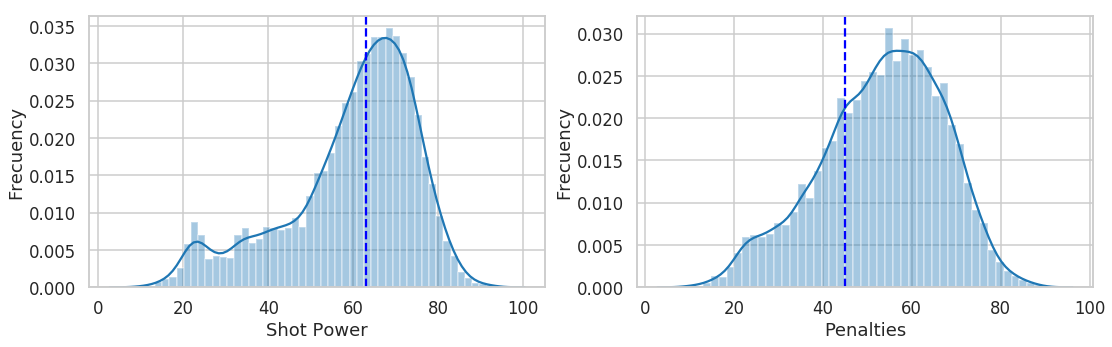

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

ax_w = sns.distplot(shot_power, norm_hist=True, ax=ax[0])
ax_w.axvline(d['Moda'][0], linestyle='dashed', color='b', label='Mean')
ax_w.set_xlabel("Shot Power")
ax_w.set_ylabel("Frecuency")
ax_w.plot()

ax_h = sns.distplot(penalties, norm_hist=True, ax=ax[1])
ax_h.axvline(d['Moda'][1], linestyle='dashed', color='b', label='Mean')
ax_h.set_xlabel("Penalties")
ax_h.set_ylabel("Frecuency")
ax_h.plot()

> Ejercicio 2

Realizar un Análisis de valores atípicos (outliers) de las variables anteriores.

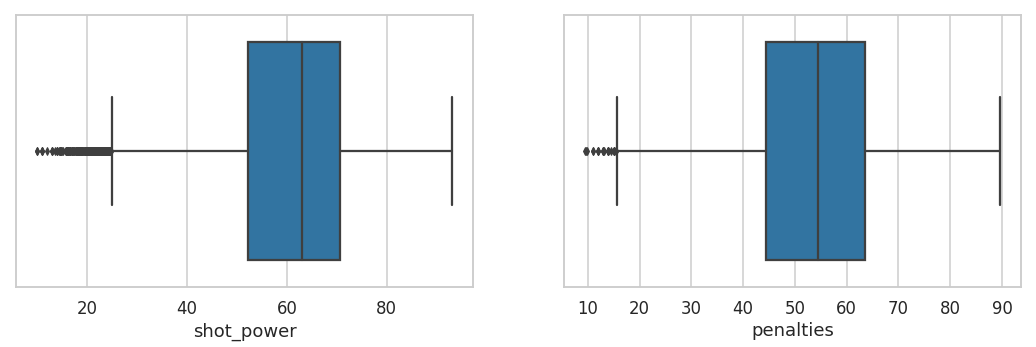

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.boxplot(x=shot_power, ax=ax[0])
sns.boxplot(x=penalties, ax=ax[1])

> Ejercicio 3

Explicar cómo varían el analisis hecho anteriormente cuando se desglosan por la pierna hábil de cada jugador (diestro o zurdo).  
Comparar cualitativamente y gráficamente ambas distribuciones.

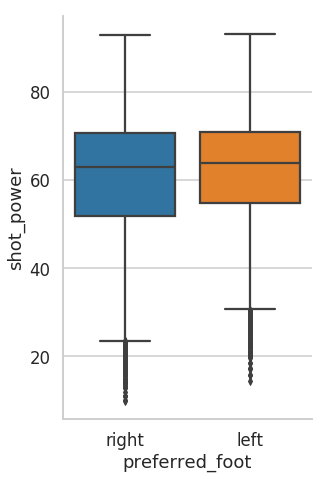

In [17]:
sns.factorplot(x='preferred_foot', y='shot_power', data=df_player, kind="box", size=7, aspect=.7)

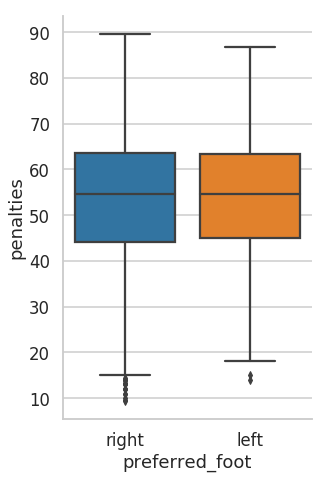

In [18]:
sns.factorplot(x='preferred_foot', y='penalties', data=df_player, kind="box", size=7, aspect=.7)

Text(0,0.5,'Frequency')

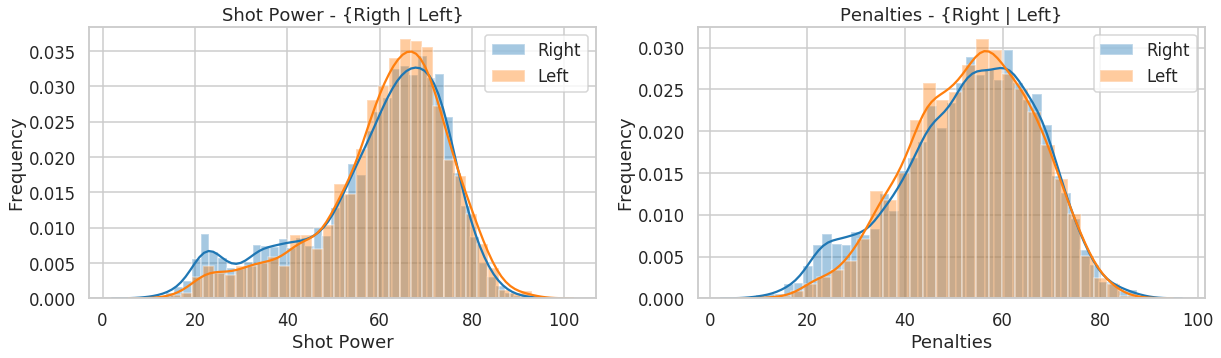

In [19]:
shot_power_foot = df_player[['shot_power', 'preferred_foot']]

shot_power_right = shot_power_foot[shot_power_foot.preferred_foot == 'right']
shot_power_right = shot_power_right.drop(columns=['preferred_foot'])

shot_power_left = shot_power_foot[shot_power_foot.preferred_foot == 'left']
shot_power_left = shot_power_left.drop(columns=['preferred_foot'])

# ============================================================= #

penalties_foot = df_player[['penalties', 'preferred_foot']]

penalties_right = penalties_foot[penalties_foot.preferred_foot == 'right']
penalties_right = penalties_right.drop(columns=['preferred_foot'])

penalties_left = penalties_foot[penalties_foot.preferred_foot == 'left']
penalties_left = penalties_left.drop(columns=['preferred_foot'])

# ============================================================= #

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1 = sns.distplot(shot_power_right, ax=ax[0], label='Right')
ax1.legend()
ax2 = sns.distplot(shot_power_left, ax=ax[0], label='Left')
ax2.legend()
ax2.set_title("Shot Power - {Rigth | Left}")
ax2.set_xlabel('Shot Power')
ax2.set_ylabel('Frequency')

ax3 = sns.distplot(penalties_right, ax=ax[1], label="Right")
ax3.legend()
ax4 = sns.distplot(penalties_left, ax=ax[1], label="Left")
ax4.legend()
ax4.set_title("Penalties - {Right | Left}")
ax4.set_xlabel('Penalties')
ax4.set_ylabel('Frequency')

> Ejercicio 4

Graficar la correlacion de los features de los jugadores.  
Calcular la correlacion entre los features 'Shot Power' y 'Penalties' desglosando por la pierna habil.

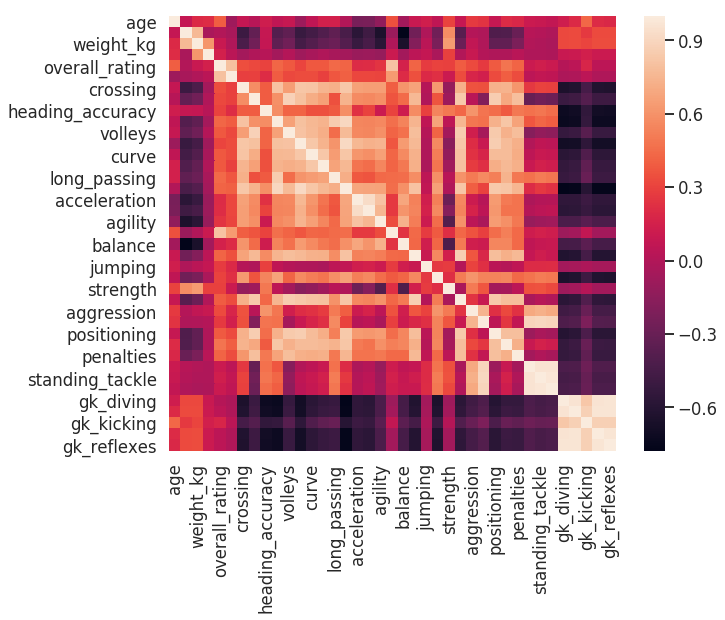

In [20]:
plt.figure(figsize=(10, 8))

corr = df_player.corr()
sns.heatmap(corr)

In [21]:
shot_power_penalties_right = shot_power_right.join(penalties_right)
corr_right = shot_power_penalties_right.corr()
display('Right Correlation', corr_right.round(2))

print("============================")

shot_power_penalties_left = shot_power_left.join(penalties_left)
corr_left = shot_power_penalties_left.corr()
display('Left Correlation', corr_left.round(2))

'Right Correlation'

,shot_power,penalties
shot_power,1.00,0.79
penalties,0.79,1.00


'Left Correlation'

,shot_power,penalties
shot_power,1.0,0.7
penalties,0.7,1.0


> Ejercicio 5

Graficar la correlacion de los entre los features 'Weight' y 'Age' de los jugadores. Que conclusiones se obtienen?

Graficar la correlacion de los entre los features 'Height' y 'Age' de los jugadores. Que conclusiones se obtienen?

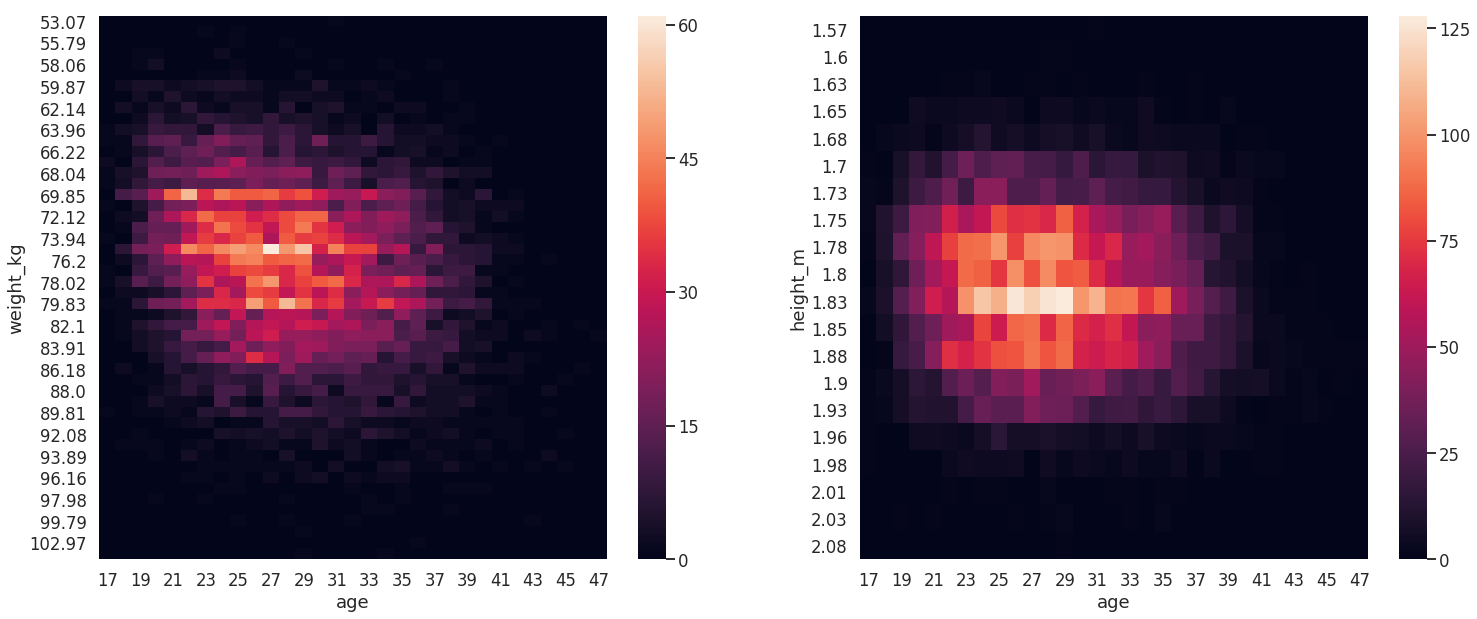

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

wa_croos = pd.crosstab(df_player['weight_kg'], df_player['age'])
ha_croos = pd.crosstab(df_player['height_m'], df_player['age'])

ax1 = sns.heatmap(wa_croos, ax=ax[0])
ax2 = sns.heatmap(ha_croos, ax=ax[1])

> Ejercicio 5: Preguntas

* Cual es la Liga Europea con mayor cantidad de partidos? Graficar.
* Cual es la temporada en donde hubo mayor cantidad de partidos? Graficar.
* Los 10 equipos con mayor cantidad de goles de local. Graficar.
* Los 10 equipos con mayor cantidad de goles de visitante. Graficar.
* El equipo que convierte la mayor cantidad de goles. Graficar.

**Extra:** Si se les ocurre algún otra métrica que puedan extraer de los datasets, los invito a que la hagan.

> Liga Europea con mayor cantidad de partidos

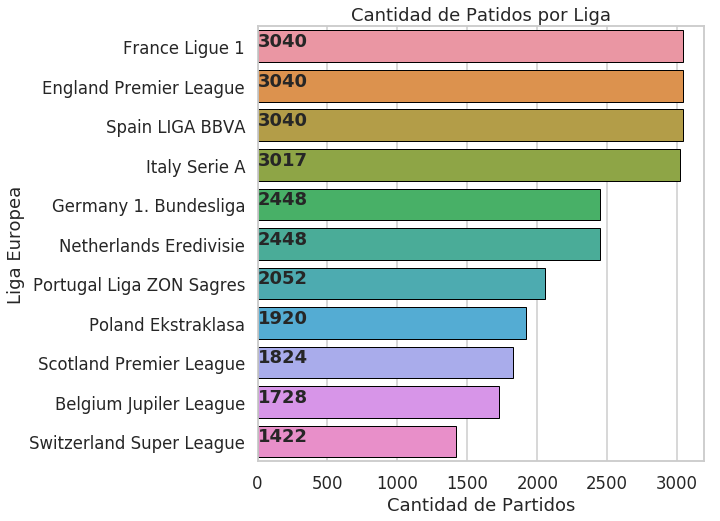

In [23]:
# Liga Europea con mayor cantidad de partidos? Graficar

plt.figure(figsize=(8, 8))
ax = sns.countplot(
    y=df_match['league_name'],
    order=df_match['league_name'].value_counts().index,
    linewidth=1,
    edgecolor='k'*df_match['league_name'].nunique()
)

for idx, i in enumerate(df_match['league_name'].value_counts().values):
    ax.text(.7, idx, i, weight='bold')

plt.title("Cantidad de Patidos por Liga")
plt.xlabel("Cantidad de Partidos")
plt.ylabel("Liga Europea")
plt.show()

> Top 10 de Equipos con mayor cantidad de goles convertidos: Total, Local y Visitante

In [24]:
ht_goal = df_match.groupby('home_team_long_name')['home_team_goal'].sum().reset_index()
ht_goal = ht_goal.sort_values(by='home_team_goal', ascending=False)

at_goal = df_match.groupby('away_team_long_name')['away_team_goal'].sum().reset_index()
at_goal = at_goal.sort_values(by='away_team_goal', ascending=False)

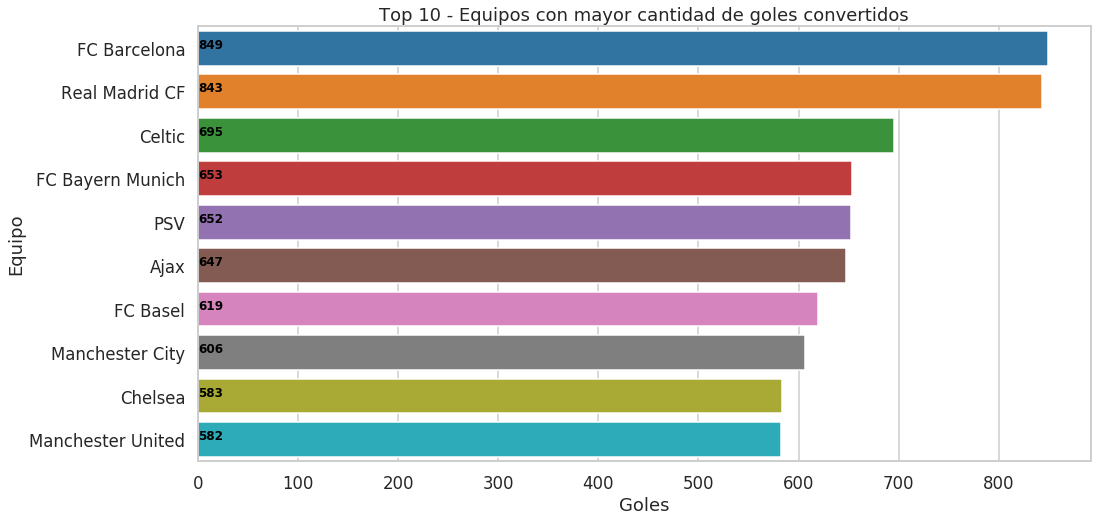

In [25]:
df_team_goals = pd.concat([
    ht_goal.rename(columns={
        'home_team_long_name': 'team',
        'home_team_goal': 'goals',
    }),
    at_goal.rename(columns={
        'away_team_long_name': 'team',
        'away_team_goal': 'goals',
    }),
])

df_team_goals = df_team_goals.groupby('team').agg({'goals': 'sum'}).reset_index()
df_team_goals = df_team_goals.sort_values(by='goals', ascending=False)
df_team_goals = df_team_goals.head(10)

plt.figure(figsize=(16, 8))

ax = sns.barplot(
    x='goals',
    y='team',
    data=df_team_goals,
)
for idx, i in enumerate(df_team_goals['goals']):
    ax.text(.3, idx, i, weight='bold', color='k', fontsize=12)

plt.title("Top 10 - Equipos con mayor cantidad de goles convertidos")
plt.xlabel('Goles')
plt.ylabel('Equipo')
plt.show()

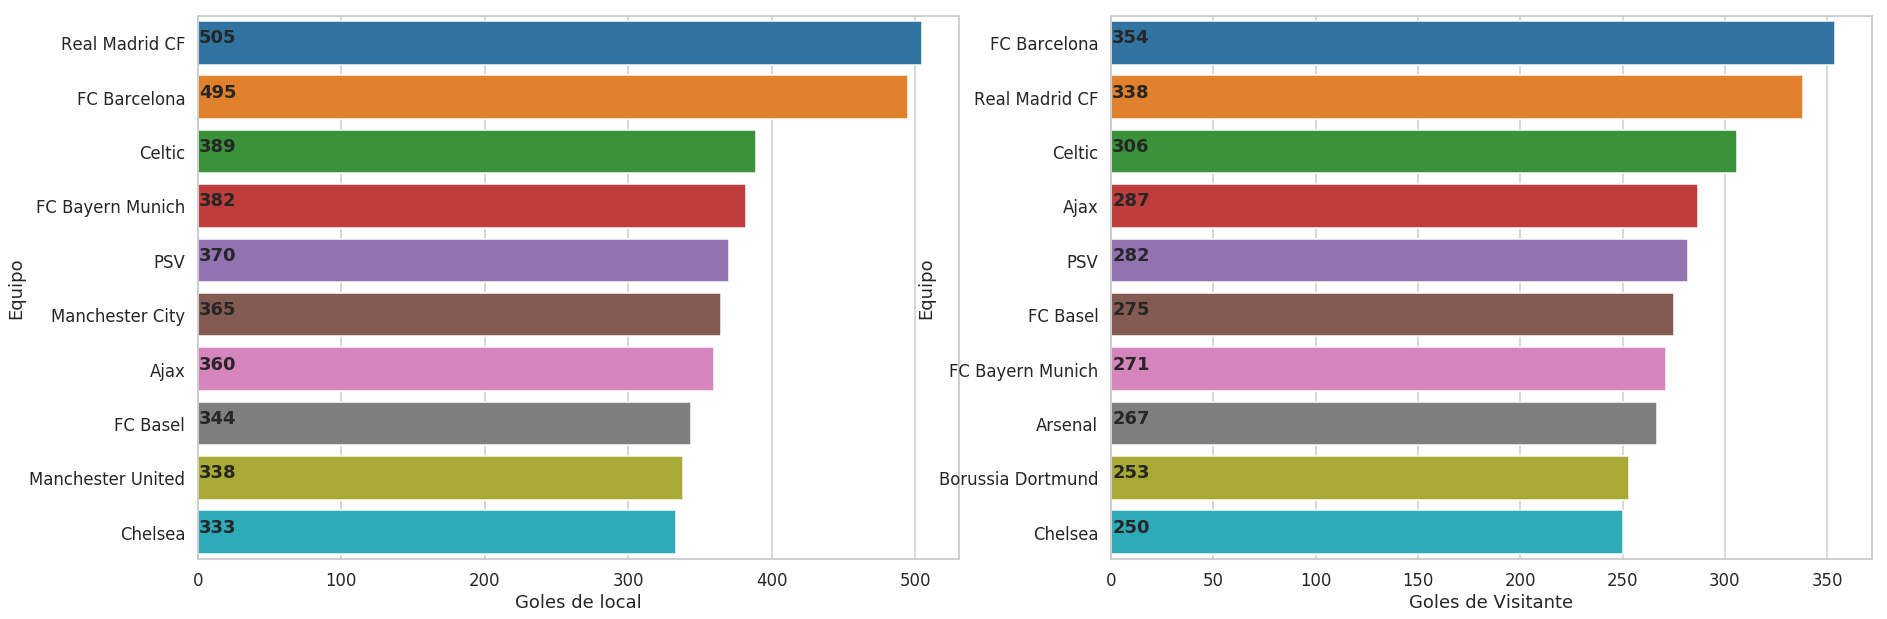

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

ax1 = sns.barplot(
    y='home_team_long_name',
    x='home_team_goal',
    data=ht_goal.head(10),
    ax=ax[0]
)
ax1.set_xlabel('Goles de local')
ax1.set_ylabel('Equipo')
for idx, i in enumerate(ht_goal['home_team_goal'].head(10)):
    ax1.text(.7, idx, i, weight='bold')

ax2 = sns.barplot(
    y='away_team_long_name',
    x='away_team_goal',
    data=at_goal.head(10),
    ax=ax[1]
)
ax2.set_xlabel('Goles de Visitante')
ax2.set_ylabel('Equipo')
for idx, i in enumerate(at_goal['away_team_goal'].head(10)):
    ax2.text(.7, idx, i, weight='bold')

> Distribucion de Cantidad de goles convertidos: Total, Local y Visitante

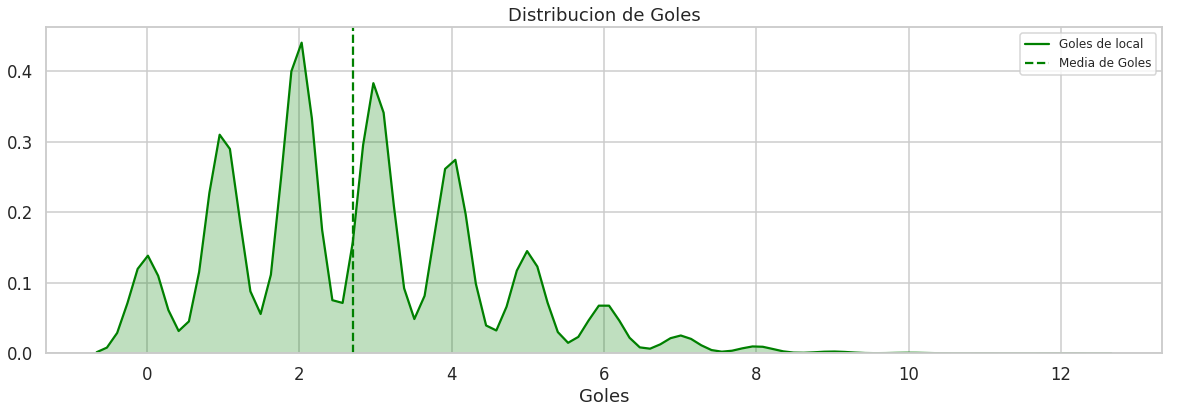

In [27]:
plt.figure(figsize=(20, 6))
sns.kdeplot(
    df_match['total_goal'],
    shade=True,
    color='g',
    label='Goles de local'
)
plt.axvline(
    df_match['total_goal'].mean(),
    linestyle='dashed',
    color='g',
    label='Media de Goles'
)

plt.legend(loc='best', prop={'size': 12})
plt.title("Distribucion de Goles")
plt.xlabel("Goles")
plt.show()

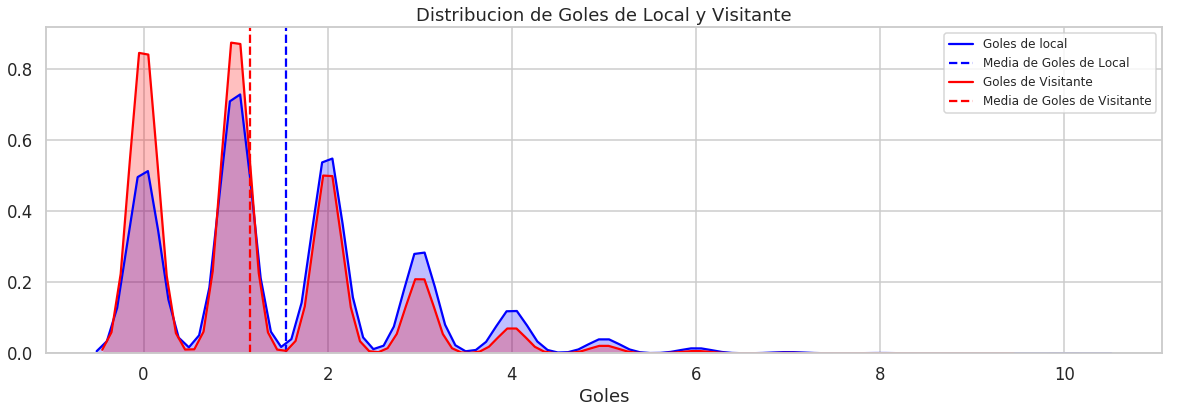

In [28]:
plt.figure(figsize=(20, 6))
sns.kdeplot(
    df_match['home_team_goal'],
    shade=True,
    color='b',
    label='Goles de local'
)
plt.axvline(
    df_match['home_team_goal'].mean(),
    linestyle='dashed',
    color='b',
    label='Media de Goles de Local'
)
sns.kdeplot(
    df_match['away_team_goal'],
    shade=True,
    color='r',
    label='Goles de Visitante'
)
plt.axvline(
    df_match['away_team_goal'].mean(),
    linestyle='dashed',
    color='r',
    label='Media de Goles de Visitante'
)
plt.legend(loc='best', prop={'size': 12})
plt.title("Distribucion de Goles de Local y Visitante")
plt.xlabel("Goles")
plt.show()

> Boxplot de Goles por Temporada

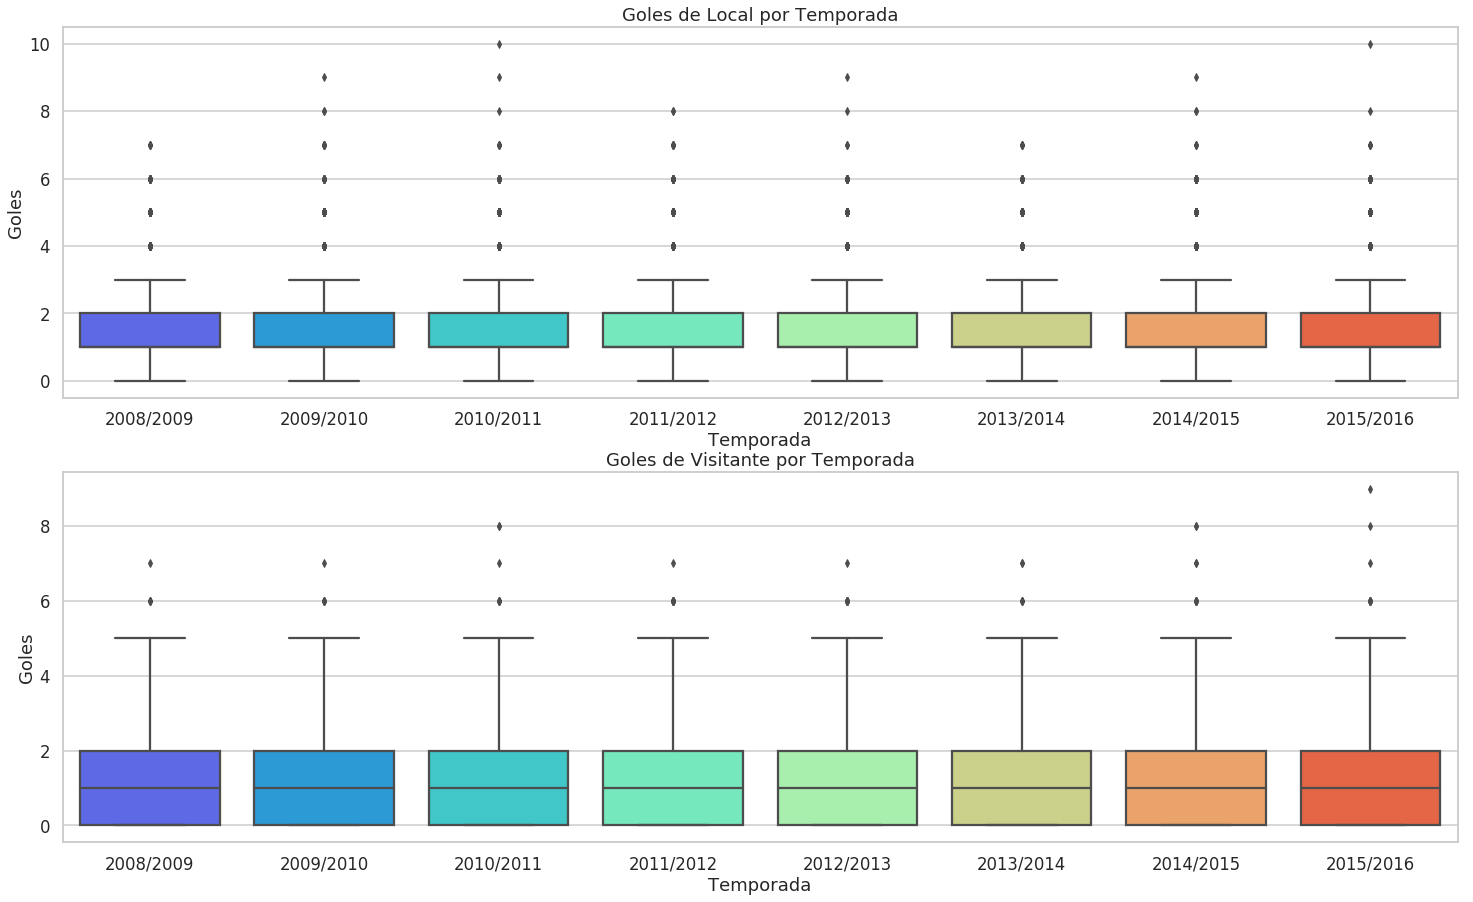

In [29]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 1, 1)
sns.boxplot(
    x=df_match['season'],
    y=df_match['home_team_goal'],
    palette='rainbow'
)
plt.title("Goles de Local por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Goles")

plt.subplot(2, 1, 2)
sns.boxplot(
    x=df_match['season'],
    y=df_match['away_team_goal'],
    palette='rainbow'
)
plt.title("Goles de Visitante por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Goles")

plt.show()

> Resumen de Goles convertidos por Temporada: Total, Local y Visitante

In [30]:
tha_goal = df_match.groupby('season').agg({
    'total_goal': 'sum',
    'home_team_goal': 'sum',
    'away_team_goal': 'sum'
})
tha_goal = tha_goal.reset_index()

In [31]:
display(tha_goal)

,season,total_goal,home_team_goal,away_team_goal
0,2008/2009,8672,5007,3665
1,2009/2010,8632,4978,3654
2,2010/2011,8749,5048,3701
3,2011/2012,8747,5064,3683
4,2012/2013,9039,5053,3986
5,2013/2014,8389,4787,3602
6,2014/2015,8897,5055,3842
7,2015/2016,9162,5135,4027


In [32]:
# plt.figure(figsize=(20, 10))

# plt.subplot(3, 1, 1)
# sns.pointplot(
#     x='season',
#     y='total_goal',
#     data=tha_goal
# )
# plt.title("Goles de Local por Temporada")
# plt.xlabel("Temporada")
# plt.ylabel("Goles")

# plt.subplot(3, 1, 2)
# sns.pointplot(
#     x='season',
#     y='home_team_goal',
#     data=tha_goal
# )
# plt.xlabel("Temporada")
# plt.ylabel("Goles")

# plt.subplot(3, 1, 3)
# sns.pointplot(
#     x='season',
#     y='away_team_goal',
#     data=tha_goal
# )
# plt.xlabel("Temporada")
# plt.ylabel("Goles")

# plt.show()

Text(0,0.5,'Goles')

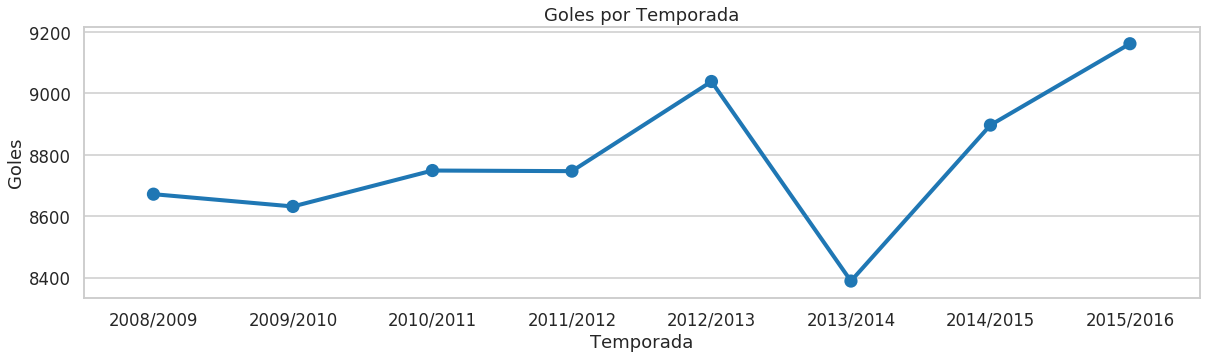

In [33]:
plt.figure(figsize=(20, 5))

sns.pointplot(
    x='season',
    y='total_goal',
    data=tha_goal
)
plt.title("Goles por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Goles")

Text(0,0.5,'Goles')

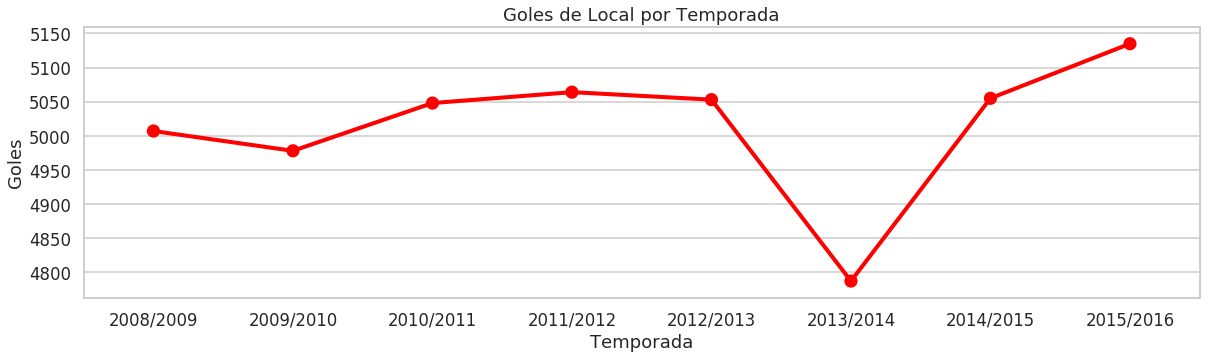

In [34]:
plt.figure(figsize=(20, 5))

sns.pointplot(
    x='season',
    y='home_team_goal',
    data=tha_goal,
    color='r',
)
plt.title("Goles de Local por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Goles")

Text(0,0.5,'Goles')

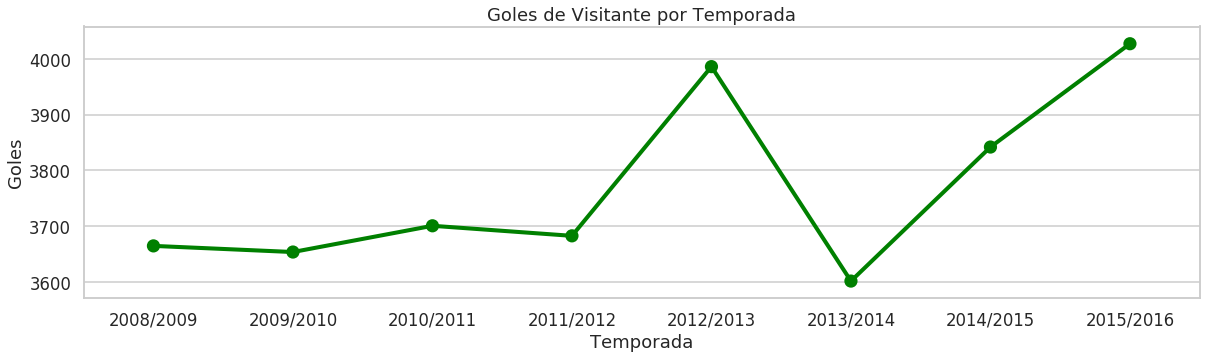

In [35]:
plt.figure(figsize=(20, 5))

sns.pointplot(
    x='season',
    y='away_team_goal',
    data=tha_goal,
    color='g',
)
plt.title("Goles de Visitante por Temporada")
plt.xlabel("Temporada")
plt.ylabel("Goles")

> Proporciones de los resultados de los partidos

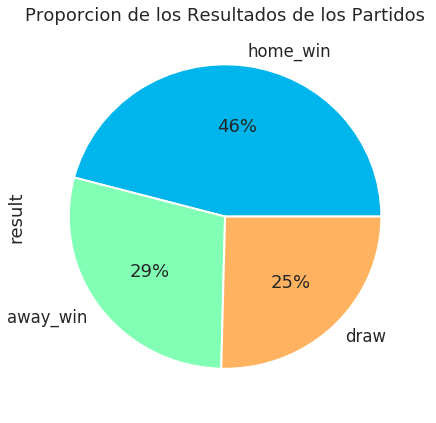

In [36]:
htg = df_match['home_team_goal'].tolist()
atg = df_match['away_team_goal'].tolist()

result_list = ['home_win' if hg > ag else 'away_win' if hg < ag else 'draw' for hg, ag in zip(htg, atg)]
df_match['result'] = result_list

plt.figure(figsize=(7, 7))

df_match["result"].value_counts().plot.pie(
    autopct = "%1.0f%%",
    colors=sns.color_palette("rainbow", 3),
    wedgeprops = {"linewidth":2,"edgecolor":"white"}
)

plt.title("Proporcion de los Resultados de los Partidos")
plt.show()